## Introduction

Principal Component Analysis or PCA is one of the most popular techniques to reduce the dimensionality of a dataset by transforming its large set of features into a smaller one without losing much of the information. It can be useful as a tool for visualization,  noise filtering, and feature extraction and engineering. 


# How does the PCA work?


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, M = 2.0, B = 5.0, X_MIN = 0.0, X_MAX = 30.0):
      
      n_samples = n
      random = np.random.RandomState(1)  # RandomState Seeding

      # create random x values
      x1 = random.uniform(low=X_MIN, high=X_MAX, size=n_samples).reshape(n_samples, 1) 

      # calculate x2 values along the line
      x2 = M * x1 + B

      # add random noise
      x2 += random.normal(loc=0.0, scale=5.0, size=x2.shape).reshape(n_samples, 1)
      X = np.concatenate([np.round(x1,2), np.round(x2,2)], axis=1)
      return X 

X = generate_data(25)

# Normalize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

X.shape

(25, 2)

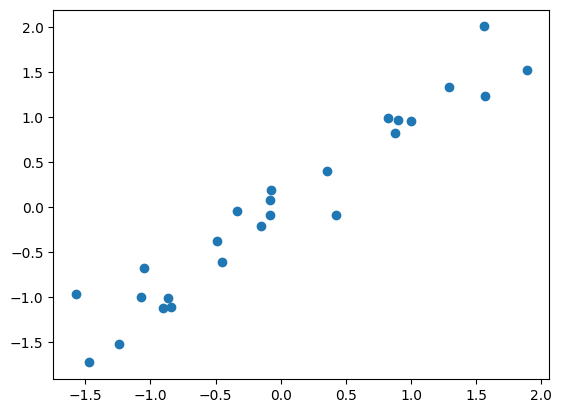

In [11]:
plt.scatter(X[:,0],X[:,1])

### Covariance Matrix

You want to reduce the number of features in the dataset while preserving most of the "information". But what does this "information" actually mean? It refers to how the features vary with respect to themselves (variance) as well as the other features (covariance). Covariance matrix of $X$ consists of the covariances associated with all possible pairs of the features in $X$. The covariance matrix of $X$ is denoted by $\mathbf{Cov}$ and computed as:

\begin{align}
\mathbf{Cov} &= X^TX\\
\mathbf{Cov} &= 
\begin{bmatrix}
\text{cov}({x_1,x_1}) & \text{cov}({x_1,x_2}) \\
\text{cov}({x_2,x_1}) & \text{cov}({x_2,x_2}) \\
\end{bmatrix}
\end{align}


Note: The diagonals $\text{cov}(x_i, x_i)$ is the variance of the feature $x_i$


In [12]:
cov = np.dot(X.T, X)
cov

array([[25.        , 24.12294297],
       [24.12294297, 25.        ]])

Now that you have the covariance matrix, you want to find its eigenvectors. **There are $d$ eigenvalues / eigenvectors for a covariance matrix with $d$ features**. The eigenvectors of a covariance matrix point at the direction along which the maximum variance can be retained. The amount of variance retained by each eigenvector depends on its corresponding eigenvalue. Eigenvectors corresponding to the larger eigenvalues retain more variance than the ones with smaller eigenvalues.


Let $\lambda_1$ be the first eigenvalue of the covariance matrix $\mathbf{Cov}$ and $\mathbf{v_1}$ be the corresponding eigenvector. Similarly, let $\lambda_2$ be the second eigenvalue of the covariance matrix and $\mathbf{v_2}$ be the corresponding eigenvector.



In [13]:
e_values, e_vectors = np.linalg.eig(cov)

In [16]:
lambda1, lambda2 = e_values

In [17]:
v1, v2 = e_vectors[:,0], e_vectors[:,1]

Here, you can see that the eigenvector $v_1$ corresponding to the eigenvalue $\lambda_1=0.87$ is $\begin{bmatrix}
-0.707\\
0.707 
\end{bmatrix}$ and the eigenvector $v_2$ corresponding to the eigenvalue $\lambda_2 = 49.122$ is $\begin{bmatrix}
-0.707\\
-0.707 
\end{bmatrix}$ 



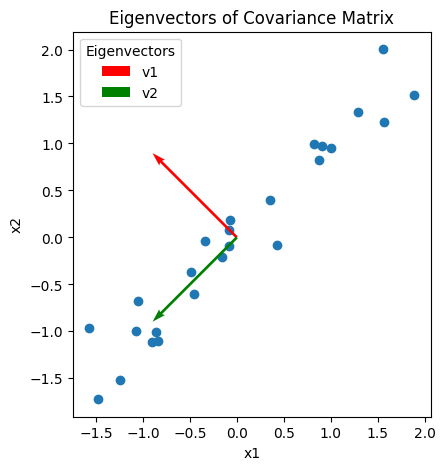

In [22]:
x = 0
y = 0
fig, ax = plt.subplots()

ax.quiver(x,y,v1[0],v1[1], angles='xy', scale=3, color='red', zorder=10)
ax.quiver(x,y,v2[0],v2[1], angles='xy', scale=3, color='green', zorder=10)
ax.legend(labels=['v1', 'v2'], title='Eigenvectors')

ax.scatter(X[:, 0], X[:, 1], zorder=2)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Eigenvectors of Covariance Matrix")

ax.set_aspect('equal')
fig.set_figheight(5)
fig.set_figwidth(5)
plt.show()

Here you can see that the data has more variance along the direction of $v_2$ than along the direction of $v_1$. As mentioned earlier, this is due to the fact that $\lambda_1<\lambda_2$.


## Principal Components

We have the information, and we have the vectors that retain the maximum of that information. Now let's create new features using those vectors. As said earlier, the eigenvectors corresponding to larger eigenvalues retain more variance than the smaller ones. **When you order the eigenvectors in descending order of their corresponding eigenvalues, you get the principal components**.


In [23]:
idx = e_values.argsort()[::-1]
e_values = e_values[idx]

principle_components = e_vectors[:,idx]

In [24]:
principle_components

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [26]:
no_of_pc = principle_components.shape[1]
explained_variance = []

for i in range(no_of_pc):
    variance = (e_values[i] / sum(np.diagonal(cov)) * 100 )
    explained_variance.append(variance)

explained_variance

[np.float64(98.24588594597589), np.float64(1.754114054024121)]

As you can see, the first principal component accounts for maximum variance (98.25%) in the data, whereas the second principal component accounts for just about 1.75% of the variance in data.  

We know that the principal components are the eigenvectors ordered in descending order of their corresponding eigenvalues. So, in general, the first principal component retains the maximum variance, higher than the second principal component. The second principal component retains a higher variance than the third, and so on. The last principal component retains the minimum variance


There are certain properties of these principal components:

* As mentioned earlier, for a dataset with $d$ features, there are $d$ eigenvectors. So there are $d$ principal components as well. Since the first $k$ principal components retain the maximum variance, you can select $k < d$ principal components to represent your data. In our case, there are only two initial features *i.e.* $d=2$. So we have two principal components.

* Since the principal components are the eigenvectors of a symmetric matrix, they are perpendicular to each other. Statistically, this means that the principal components are uncorrelated to each other.

* The principal components are the linear combinations of the original features. 


## Projecting the data into the Principal Components

Apart from standardization, you have not made any changes to the original data. You just computed the two principal components from the data. Now let's use those principal components to reduce the number of features. 

Let's first create a matrix containing the first $k$ principal components to be used as the new features. Let's call this matrix $U$.

$$\mathbf{U} = \begin{bmatrix}
| & | & | & |\\
\mathbf{pc_1}\ & \mathbf{pc_2}\ &.... & \mathbf{pc_k}\\
| & | & | & |\\
\end{bmatrix}$$


In [27]:
U = principle_components.T

Finally, you need to find the position of the data points on the new axis *i.e.* project the data points onto the principal component. Let's find the new dataset with less number of features computed by projecting the original data onto the principal component and call it $X_{reduced}$. 

$$\mathbf{X_{reduced}} =  (\mathbf{U}^T\mathbf{X}^T)^T$$


In [29]:
X_projected = np.dot(U.T, X.T).T

In [30]:
X_projected

array([[-6.54739664e-04,  1.16100560e-01],
       [-1.38092654e+00, -3.68397903e-02],
       [ 1.79067563e+00,  4.32515692e-01],
       [ 6.10835240e-01,  8.41984714e-02],
       [ 1.21884713e+00,  2.63010841e-01],
       [ 1.95191076e+00, -1.95422483e-01],
       [ 1.42767116e+00, -1.46310164e-01],
       [ 2.67174238e-01,  2.08829165e-01],
       [ 2.53116595e-01, -3.48950143e-02],
       [-5.29254717e-01,  2.97308276e-02],
       [-8.10711705e-02,  1.84723051e-01],
       [-1.20288576e+00, -3.79714803e-02],
       [ 1.37607210e+00, -1.85692922e-01],
       [-1.97811178e+00, -2.36587902e-01],
       [ 2.26033589e+00, -1.75302152e-01],
       [-1.28510367e+00,  1.20064611e-01],
       [ 1.19037046e-01, -5.27607430e-03],
       [-2.42222941e-01, -3.58391859e-01],
       [ 1.46207646e+00,  5.17936274e-02],
       [ 1.32285243e+00, -1.00461132e-01],
       [-1.85515276e+00,  3.13379362e-02],
       [-2.41001384e+00, -2.61279792e-01],
       [ 7.47140938e-01, -1.07707228e-01],
       [-1.

To better understand the projection, you will need to visualize it in the scatterplot of the original data $\mathbf{X}$. So let's plot the original data and it's projection on the first principal component.


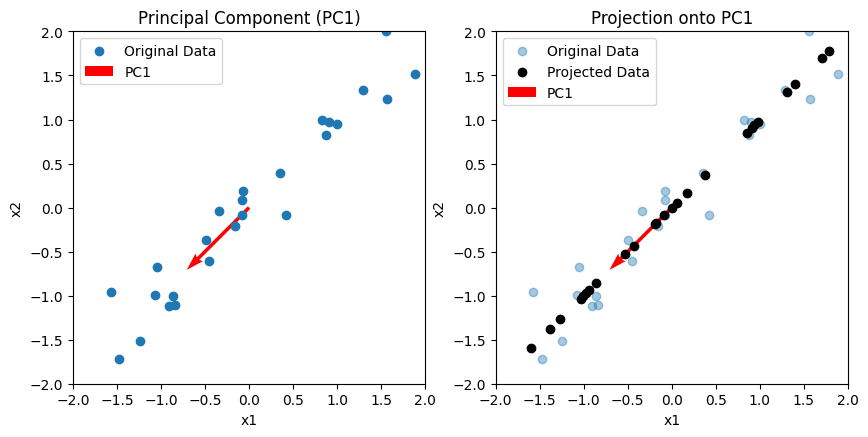

In [43]:
# -----------------------------
# Projection onto PC1
# -----------------------------
X_projected = X @ v2.reshape(-1, 1)       # (n,1)
X_inverse = X_projected @ v2.reshape(1, -1)  # back to 2D

# -----------------------------
# Plotting
# -----------------------------
x, y = 0, 0
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
 
# ---- Plot 1: Original data + PC1 direction
axs[0].scatter(X[:, 0], X[:, 1], label="Original Data", zorder=2)
axs[0].quiver(
    x, y, v2[0], v2[1],
    angles='xy', scale_units='xy', scale=1,
    color='red', width=0.01, label="PC1"
)
axs[0].set_title("Principal Component (PC1)")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-2, 2)
axs[0].set_aspect('equal')
axs[0].legend()
 
# ---- Plot 2: Projection onto PC1
axs[1].scatter(X[:, 0], X[:, 1], label="Original Data", alpha=0.4)
axs[1].scatter(X_inverse[:, 0], X_inverse[:, 1],
               color='black', label="Projected Data", zorder=10)
axs[1].quiver(
    x, y, v2[0], v2[1],
    angles='xy', scale_units='xy', scale=1,
    color='red', width=0.01, label="PC1"
)
axs[1].set_title("Projection onto PC1")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
axs[1].set_xlim(-2, 2)
axs[1].set_ylim(-2, 2)
axs[1].set_aspect('equal')
axs[1].legend()
 
plt.show()

## Applications of PCA


**Dimensionality Reduction:** PCA is predominantly used to reduce the dimension of a large dataset. As you saw earlier, PCA can effectively reduce the number of features without losing much of the information. This helps in better visualizing the data and building a model that generalizes well to new data. 

**Image Compression:** An image is a matrix of pixel values. PCA can reduce the dimensions of the matrix representing an image. PCA finds the principal components that represent the image best. 

**Noise Filtering:** PCA is also used to filter the noise present in the signal. Any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. Hence, if you take only the larger subset of the principal component with a high variance of data, then the reconstructed data or signal should be mostly actual signal.

**Quantitative Finance:** In quantitative finance, the price of a stock is dependent on 30-500 different factors or variables. You can use PCA to find the 3-4 principal components that represent all those variables. Then you can use those principal components to analyze risk and come up with trading strategies.



## Limitations of PCA

**Linear Assumption:** The principal components found by PCA are the linear combination of the existing features. As a result, they are simply some straight lines. These straight lines can represent only those data whose features are **linearly correlated**. However, if the features are not linearly correlated like in the figure below, the principal components can not represent the data well. 

<figure align="center">


<p>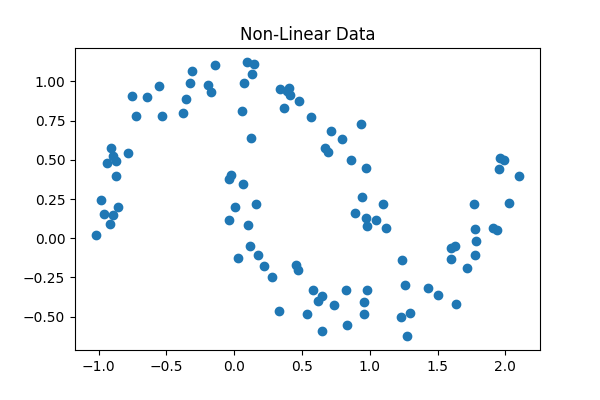</p>


<p>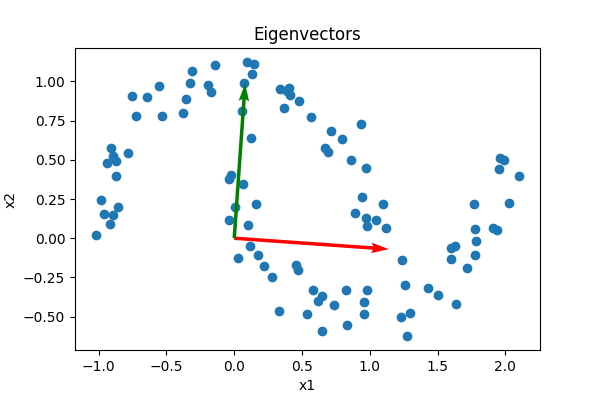</p>
       <figcaption>Figure: PCA on non-linear data</figcaption>
   </figure>



In [44]:
# Sklern Implementation

from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=999)

In [45]:
X_red = pca.fit_transform(X)

In [47]:
pca.explained_variance_ratio_

array([0.98245886])

In [49]:
pca.components_

array([[0.70710678, 0.70710678]])